---

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from representations import mds, plot_dendrogram
import os
import pandas as pd

Michael Lee has an excellent page full of datasets that include human similarity judgments: [http://faculty.sites.uci.edu/mdlee/similarity-data/](http://faculty.sites.uci.edu/mdlee/similarity-data/).

To access this data, download the zip file using the function `download_similarity_datasets`. Note that you will need an internet connection for this! Also, if you want to see what this function is doing, you can look at its source code using the double question mark:

In [59]:
from util import download_similarity_datasets
download_similarity_datasets??

In [60]:
# dataset_location = download_similarity_datasets()
dataset_location = os.path.join("data", "similarity_data")


We can take a look at what files we now have:

In [61]:
import os
print(os.listdir(dataset_location))

['addtreegrow.m', 'faces11.mat', 'sport_romney.mat', 'toys_romney.mat', 'displayrepn_c.m', 'mds2labs.m', 'colour.mat', 'bodies_viken.mat', 'displaytree.m', 'dotpatterns.mat', 'texturebrodatz_heaps.mat', 'bic.m', 'displayrepn_d.m', 'faces5.mat', 'adclus.m', 'fish_romney.mat', 'distinctclus.m', 'animalnames11.mat', 'texturemit_heaps.mat', 'adclusgrow.m', 'countriessim.mat', 'commonclus.m', 'fruit2_romney.mat', 'vehicles2_romney.mat', 'nonsense_romney.mat', 'furniture2_romney.mat', 'phonemes.mat', 'classicalmds.m', 'fruit_romney.mat', 'fruits.mat', 'countriesdis.mat', 'similarity_dump.txt', 'abstractnumbers.mat', 'weapons_romney.mat', 'faces_steyvers.mat', 'druguse.mat', 'animalpictures11.mat', 'mds2c.m', 'flowerpots.mat', 'country_robinsonhefner.mat', 'diprox.m', 'clothing2_romney.mat', 'textures.mat', 'congress.mat', 'lines_cohen.mat', 'furniture_romney.mat', 'letters.mat', 'auditory.mat', 'tools_romney.mat', 'morsenumbers.mat', 'adclus2.m', 'birds_romney.mat', 'animalpictures5.mat', 'm

You'll notice that there are `.m` and `.mat` files. The `.m` files are Matlab scripts, so we'll just ignore those. The `.mat` files are Matlab data files (described on the website above) and we can load them into Python using the scipy function `scipy.io.loadmat`. We've written a helper function called `load_dataset` to do this for you, but you can see what this function is doing by using the double question marks:

In [62]:
from util import load_dataset
load_dataset??

As an example, here is some data that is similarity judgments of spoken letters:

In [63]:
filename = os.path.join(dataset_location, 'risks.mat')
data_risks = load_dataset(filename)
data_risks
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns
def cluster_corr(corr_array, inplace=False):
    """
    Source: https://wil.yegelwel.com/cluster-correlation-matrix/
    Rearranges the correlation matrix, corr_array, so that groups of highly 
    correlated variables are next to eachother 
    
    Parameters
    ----------
    corr_array : pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix 
        
    Returns
    -------
    pandas.DataFrame or numpy.ndarray
        a NxN correlation matrix with the columns and rows rearranged
    """
    pairwise_distances = sch.distance.pdist(corr_array)
    linkage = sch.linkage(pairwise_distances, method='complete')
    cluster_distance_threshold = pairwise_distances.max()/2
    idx_to_cluster_array = sch.fcluster(linkage, cluster_distance_threshold, 
                                        criterion='distance')
    idx = np.argsort(idx_to_cluster_array)
    
    if not inplace:
        corr_array = corr_array.copy()
    
    if isinstance(corr_array, pd.DataFrame):
        return corr_array.iloc[idx, :].T.iloc[idx, :], idx
    return corr_array[idx, :][:, idx], idx

---
## Part A (5 points)

In Part A of this challenge, you will select a new dataset from those downloaded above and analyze it.

<div class="alert alert-success">Select a dataset. Go to the website above, find the relevant paper, and read its abstract. Write two sentences below describing the stimuli and what kind of judgment was being made.</div>

THe stimuli were primary causes of death in the United States during the time of the paper. The authors used judgement of similarity - subjects rated each pair of risks from a scale of 1 - 9 in increasing similarity.

<div class="alert alert-success">Create 2 or 3 plots revealing patterns or structure present in the data. You may want to create multiple subplots to do this. Hint: you can use two functions we provided you below.</div>

We have provided you with a function, `mds`, which performs the MDS algorithm. 
We have also provided for you a `plot_dendrogram` function that will perform hierarchical clustering and then create a dendrogram plot for you. Look at the documentation for the functions to figure out how to call them.

In [80]:
def plot_data(data):
    """Plots data from one of the provided data sets."""
    # YOUR CODE HERE
    figure, ax = plt.subplots(2, 2, figsize=(20, 20))
    names = data['names']
    dis = plot_dendrogram(ax[0, 0], data['similarities'], data['names'])
    ax[0, 0].set_title("Dendogram of Risks")
    ax[0, 0].set_xlabel("Activity (Risks)")
    ax[0, 0].set_ylabel("Distance Between Child Clusters")
#     ax[0].set_aspect('equal')
    pos = mds(1-data['similarities'])
    ax[0, 1].set_title("Scatterplot of Risks (MDS)")
    ax[0, 1].set_xlabel("Position X")
    ax[0, 1].set_ylabel("Position Y")
    ax[0, 1].scatter(pos[:, 0], pos[:, 1])
    for i in range(len(data['names'])):
        ax[0, 1].text(pos[i, 0], pos[i, 1], data['names'][i])
    ax[1, 1].set_axis_off()
    corr, idx = cluster_corr(data['similarities'])
    namesReorder = [names[i] for i in idx]
    corr = pd.DataFrame(corr)
    corr.columns = namesReorder
    sns.heatmap(corr, annot=True, xticklabels=True, yticklabels=corr.columns, cmap="viridis", square=True, vmin=0.0, vmax=1.0, ax=ax[1, 0])
    ax[1, 0].set_title("Clustered Correlation Matrix of Risks")
    figure.suptitle("Risk Similarity Plot")
    figure.savefig("Risks")
print(data_risks['similarities'].shape)

(18, 18)


Here's a cell to test your plotting:

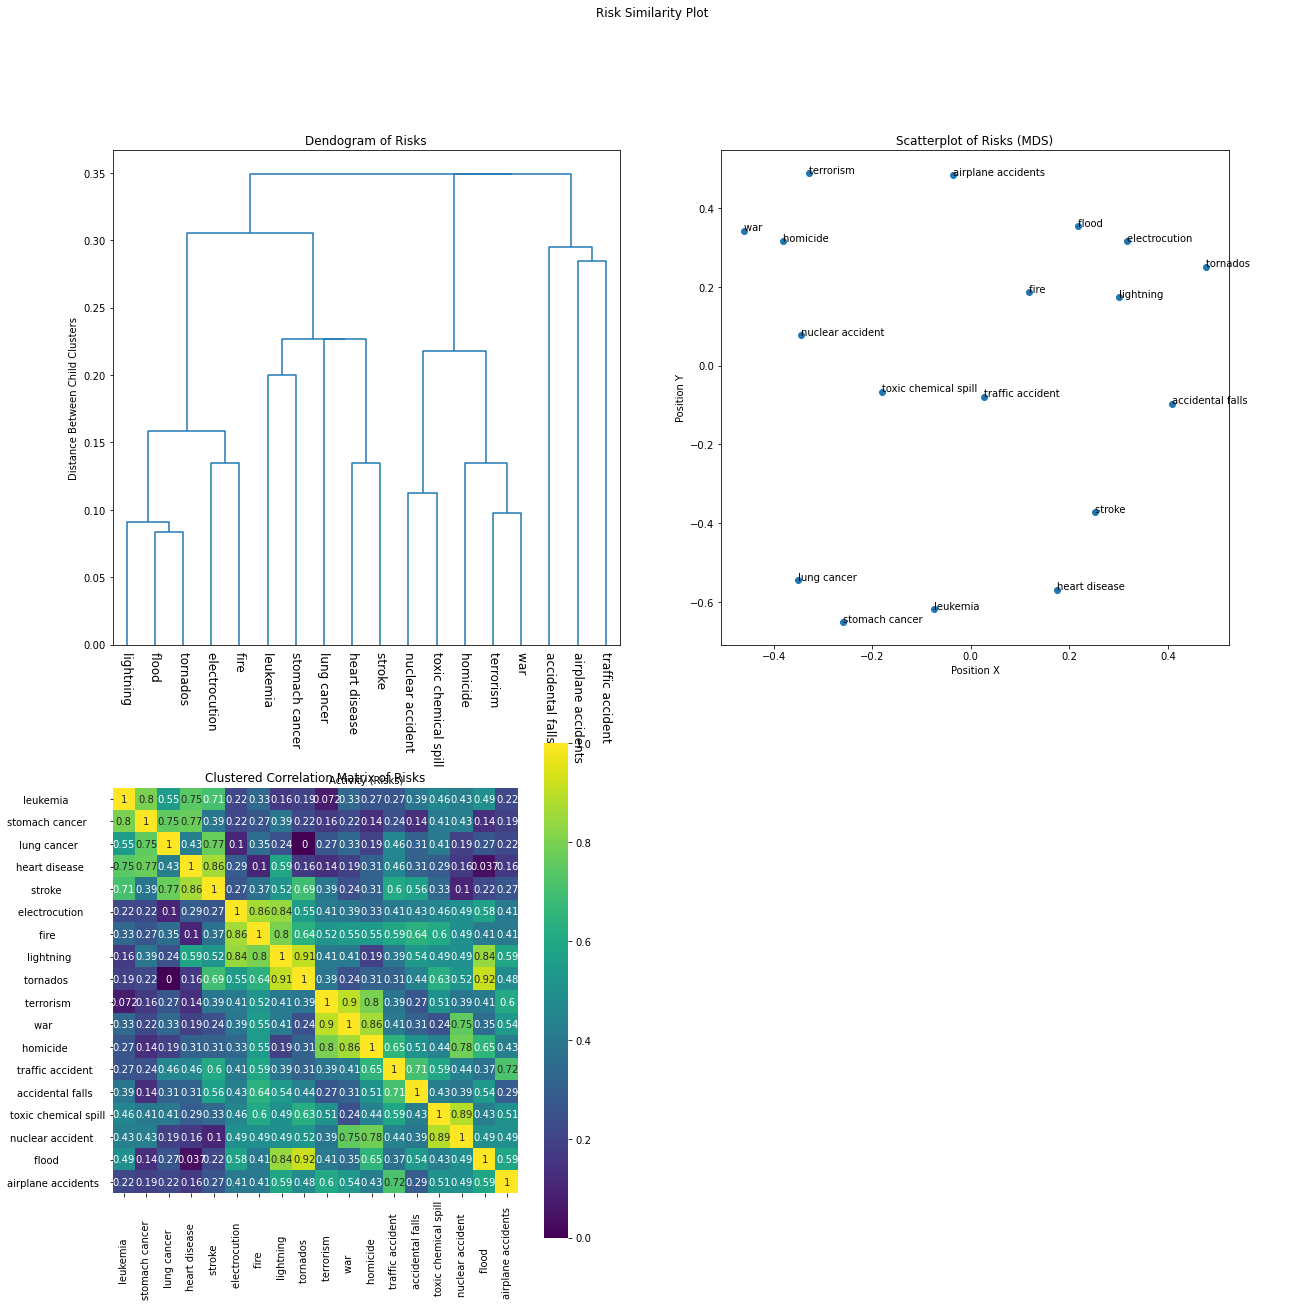

In [81]:
plot_data(data_risks)

<div class="alert alert-success">Write a paragraph of at least 100 words describing what you observe from the plots.</div>

From the dendrogram of risks, I observe that flood and tornados are viewed as similar or correlated events since their hierachical distance from each other is relatively small. Lightning is viewed as correlated with that group. Further away we find electrocution and fire are more related to the aforementioned trio than other risks. Interestingly, according to the MDS scatterplot, flood's nearest neighbor is electrocution, which is also tornado's nearest neighbor. This signals a deviation from the dendrogram since electrocution is closer to both than they are to each other. The clustered correlation matrix of risks reaffirms the dendrogram's output that flood and tornados are the closest to each other. I think this is logical because tornados and flooding are both natural disasters. Perhaps the reason why lightning is further away on the dendrogram and correlation matrix is because toranados and flooding both last some time and affects large areas whereas lightning is instant and affects a small area. Another closely related pair is war and terrorism which correlates to homicide. On the MDS plot we observe that war and homicide are much closer in distance than war and terrorism are, albeit the three are closer together than to other risks. The correlation matrix shows that war and terrorism are slightly more correlated than war and homicide, reinforcing the dendrogram's results. An advantage the correlation matrix has over the dendrogram is that we can observe how similar any pair of risks are, whereas the dendrogram can only show one set of pairs. On the other hand, the dendrogram shows how larger groups of risks relate with each other whereas the correlation matrix is stuck with first order interactions.

---
## Part B (5 points)

In Part B of this challenge, you will collect a new set of similarity data and explore it.

<div class="alert alert-success">Select a domain that you think has an interesting similarity space (e.g., ponies from My Little Pony, nose shapes of California politicians). Be creative! Your set should have between 5 and 10 items. You should collect pairwise similarity ratings from at least 5 people (you and at least 4 others). Describe the domain that you chose, and give a bulleted list of the items in your dataset.</div>

I chose sprites from the DSprites dataset [https://github.com/deepmind/dsprites-dataset](https://github.com/deepmind/dsprites-dataset) because it contains sprites of different shapes at different scales, rotation, and x and y positions. I then selected images that varied in all of the above aspects and thus have relations with each other. I have collected 8 people's (including my own) pairwise similarity ratings whose names are in the `Blank Quiz.csv` file in the directory data. The images were shown pairwise in half (upper diagonal) matrix fashion, i.e. `compare(image 0, image 1-9)`, then `compare(image 1, image 2-9`, $\ldots$, `comapre(image 8, image 9)`. The pairs were rated on a similarity scale ranging from 1, being the least similar, to 5, being the most similar. The comparisons and answer method was hosted on Google Forms [https://forms.gle/PSbRRwomps5yR8EYA](https://forms.gle/PSbRRwomps5yR8EYA). The `Blank Quiz.csv` file was downloaded from Google Forms.

- Images
    - Image 0: A normal small square in the upper left corner of the image
    - Image 1: A rotated, at $~45^{\circ}$, small square in the upper left corner of the image
    - Image 2: A rotated, at $~45^{\circ}$, medium square in the upper left corner of the image
    - Image 3: A rotated, at $~45^{\circ}$, large square in the upper left corner of the image
    - Image 4: A rotated, at $~15^{\circ}$ clockwise, small oval in the upper left corner of the image
    - Image 5: A rotated, at $~45^{\circ}$ small square in the upper right corner of the image
    - Image 6: A rotated, at $~45^{\circ}$ counter-clockwise, medium oval in the upper left corner of the image
    - Image 7: A rotated, at $~135^{\circ}$ clockwise, small heart in the upper left corner of the image
    - Image 8: A rotated, at $~135^{\circ}$ counter-clockwise, medium heart in the upper left corner of the image
    - Image 9: A rotated, at $~45^{\circ}$ counter-clockwise, large oval in the upper left corner of the image

- Raw Dataset (from `Blank Quiz.csv`)
    - Timestamp: Time of submitting quiz
    - Username
    - Total score
    - Name score
    - 0 and 1 (Comparison value)
    - 0 and 2 (Comparison value)
    - $\ldots$
    - 8 and 9 (Comparison value)
    
- Returned Dataset (from `data_process()`)
    - Upper diagonal of result matrix; returns (8, 45) pandas DataFrame of 8 participants with 45 comparisons each
        - Column names are obtained from `Blank Quiz.csv`
        


<div class="alert alert-success">In the following cell, construct a NumPy array that includes the raw similarity scores from each participant. Then, return the average similarity score across participants.</div>

(10, 4096)


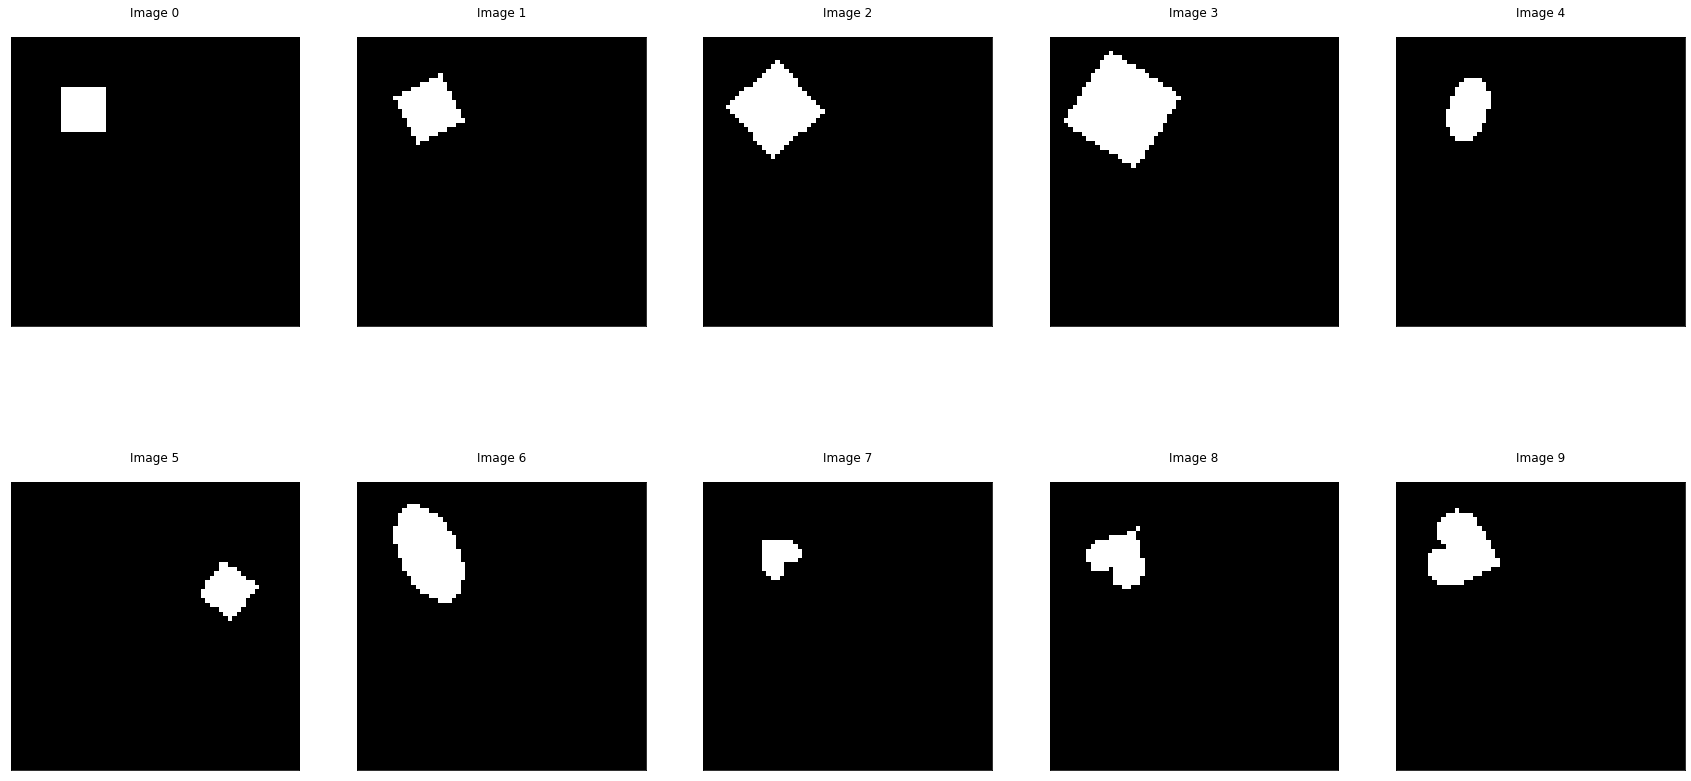

In [66]:
def img_process():
    data = np.load(os.path.join('data', 'image.npy'))
    fig, axis = plt.subplots(2, 5, figsize=(30, 15))

    for i in range(len(data)):
        ax = axis[i//5, i%5]
        ax.matshow(data[i], cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([]);
        ax.set_title("Image " + str(i))
    fig.savefig("Sprites" + ".png")
    return data.reshape(10, 64*64)
data_img = img_process()
print(data_img.shape)

In [73]:
def data_process():
    data = pd.read_csv(os.path.join('data', 'Blank Quiz.csv'))
    data = data.filter(regex="[0-9]$", axis=1)
    return data.dropna()
data = data_process()
print(data.shape)
print(len(data.iloc[1, :]))

(8, 45)
45


In [68]:
def similarities(data):
    """Returns a matrix of similarity scores, averaged across participants."""
    # YOUR CODE HERE
    data /= 5
    a = np.ones((10, 10))
    count = 0
    for row in range(10):
        for col in range(row, 10):
            if row != col:
                c = data.iloc[:, count]
                a[row][col] = np.mean(c)
                a[col][row] =a[row][col]
                count += 1
    col = (np.arange(10)).astype(str)
    b = pd.DataFrame(a, columns=["Image " + c for c in col])
    print(b.columns)
    return a, b
sim, sim_pd = similarities(data.copy())
print(sim)

Index(['Image 0', 'Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5',
       'Image 6', 'Image 7', 'Image 8', 'Image 9'],
      dtype='object')
[[1.    0.675 0.5   0.425 0.4   0.35  0.3   0.35  0.25  0.25 ]
 [0.675 1.    0.625 0.5   0.4   0.4   0.3   0.25  0.275 0.275]
 [0.5   0.625 1.    0.7   0.325 0.325 0.3   0.225 0.225 0.3  ]
 [0.425 0.5   0.7   1.    0.275 0.375 0.3   0.225 0.25  0.25 ]
 [0.4   0.4   0.325 0.275 1.    0.325 0.45  0.275 0.4   0.4  ]
 [0.35  0.4   0.325 0.375 0.325 1.    0.225 0.25  0.25  0.2  ]
 [0.3   0.3   0.3   0.3   0.45  0.225 1.    0.275 0.35  0.325]
 [0.35  0.25  0.225 0.225 0.275 0.25  0.275 1.    0.55  0.55 ]
 [0.25  0.275 0.225 0.25  0.4   0.25  0.35  0.55  1.    0.55 ]
 [0.25  0.275 0.3   0.25  0.4   0.2   0.325 0.55  0.55  1.   ]]


<div class="alert alert-success">Create 2 or 3 plots revealing patterns or structure present in this data.</div>

In [82]:
def plot_collected_data(similarities, sim_pd):
    """Plots data from the data set you collected."""
    figure, ax = plt.subplots(2, 2, figsize=(20, 20))
    sim = similarities
    a = list(np.arange(10))
    dis = plot_dendrogram(ax[0, 0], sim, a)
    ax[0, 0].set_title("Dendogram of Sprites")
    ax[0, 0].set_xlabel("Image number")
    ax[0, 0].set_ylabel("Distance Between Child Clusters")

    pos = mds(1-sim)
    ax[0, 1].set_title("Scatterplot of Sprites (MDS)")
    ax[0, 1].set_xlabel("Position x")
    ax[0, 1].set_ylabel("Position y")
    ax[0, 1].scatter(pos[:, 0], pos[:, 1])
    for i in range(10):
        ax[0, 1].text(pos[i, 0], pos[i, 1], i)
    
    sorted_sim, idx = cluster_corr(sim_pd)

    sorted_sim.columns = sim_pd.columns[sorted_sim.columns]
    print(sorted_sim.columns)
    sns.heatmap(sorted_sim, annot=True, xticklabels=True, yticklabels=True, cmap="viridis", square=True, vmin=0.0, vmax=1.0, ax=ax[1, 0])
    ax[1, 0].set_title("Clustered Correlation Matrix of Sprites Rankings")
    ax[1, 1].set_axis_off()
    figure.suptitle("Sprite Similarity Plots")
    figure.savefig("Sprite.png")
#     col = (np.arange(10).astype(str))
#     a = pd.DataFrame(data_img)
#     sns.heatmap(cluster_corr(a.T.corr())[0], cmap="viridis", square=True, vmin=0.0, vmax=1.0, ax=ax[1, 1])
#     figure.savefig("DSprites.png")
    


Here is a cell to test out your code:

Index(['Image 0', 'Image 1', 'Image 2', 'Image 3', 'Image 4', 'Image 5',
       'Image 6', 'Image 7', 'Image 8', 'Image 9'],
      dtype='object')
Index(['Image 2', 'Image 3', 'Image 0', 'Image 1', 'Image 5', 'Image 7',
       'Image 8', 'Image 9', 'Image 4', 'Image 6'],
      dtype='object')


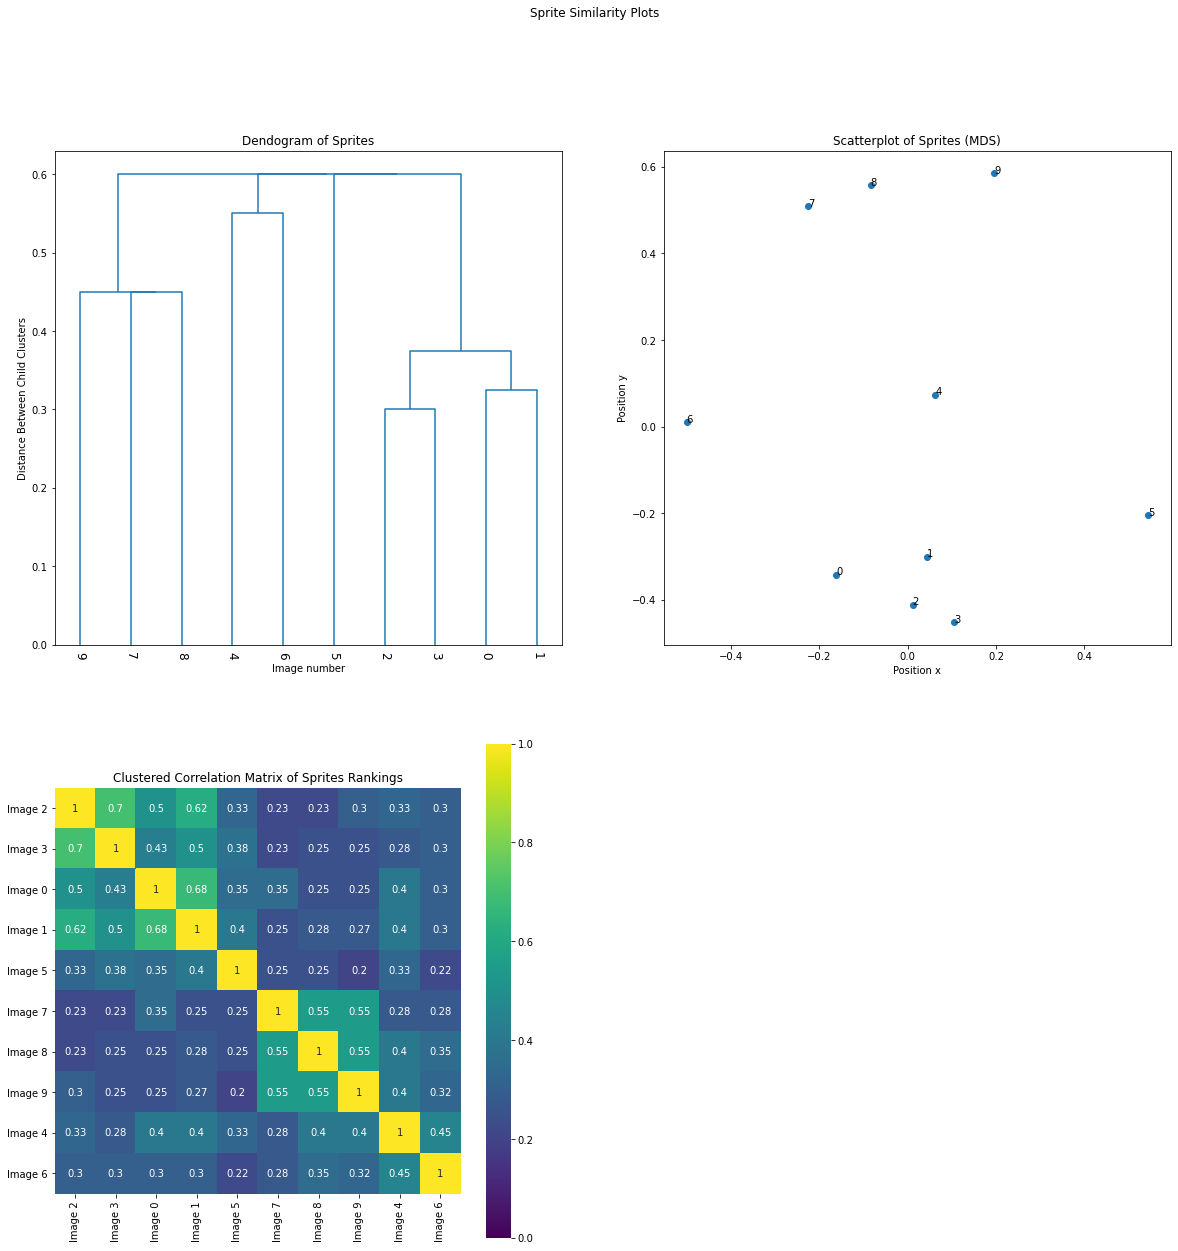

In [83]:
corr = similarities(data.copy())
plot_collected_data(corr[0], corr[1])

<div class="alert alert-success">Write a paragraph of at least 100 words describing what you observe from the plots.</div>

As expected, the squares in the top left corner are viewed as the most similar in this dataset. Image 2 and image 3 are both larger than image 0 and image 1 and tilted, providing reason for why there are the most similar. We observe the same grouping of image 2 and image 3 in the MDS scatterplot. However, an interesting observation is that image 1 is closer to images 2 and image 3 than to image 0, which corresponds to a different dendrogram structure. The correlation matrix shows that images 2 and 3 are the closest pair, reaffirming the results from the previous two plots. The next closest pair in the correlation matrix is image 0 and image 1, which corroborates with the dendrogram but disagrees with the MDS plot. It disagrees because according to the MDS plot, image 1's nearest neighbor is image 2, not image 0. Image 7, image 8, and image 9 are also similar, though with much less correlation than the previous images'. This intuitively makes sense because image 7, image 8, and image 9 are pictures of hearts. Hearts are a fundamentally different shape than squares, which also explains the low similarity between the heart images and square images. Image 4 and image 6 are somewhat correlated, which makes sense because they are both ovals. However, it is important to note that their sizes and rotations are clearly different, which explains the low level of correlation. 

---